ROLL NO: CH.SC.U4CSE23225

Part 1: Decision Tree Classifier
1.1 Decision Tree Example from Lab Manual (Pima Diabetes Dataset)

Dataset Shape:
(768, 9)

First 5 rows of the dataset:
   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

Checking for null values:
pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

Shape of training data: (614, 7)
Shape of testing data: (154, 7)

Confusion Matrix:
[[77 23]
 [19 35]]

Accuracy Score: 0.7273
Accuracy in Percentage: 72%


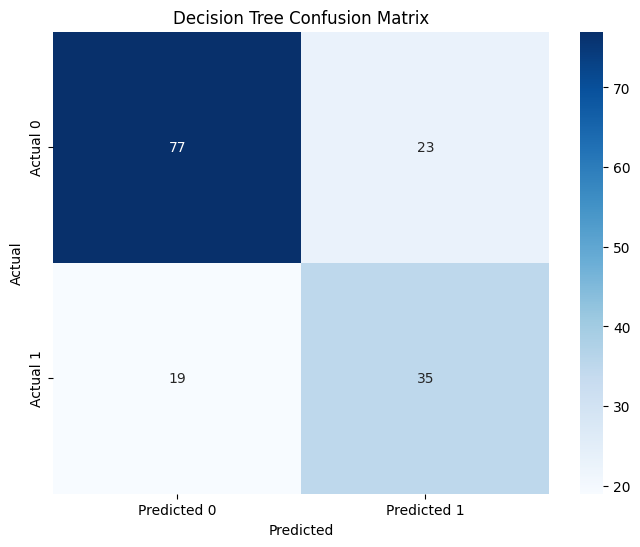

In [1]:

# Step 1: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Import the Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima_df = pd.read_csv(url, header=None, names=col_names)

# Step 3: Explore the Dataset
print("Dataset Shape:")
print(pima_df.shape)
print("\nFirst 5 rows of the dataset:")
print(pima_df.head())
print("\nChecking for null values:")
print(pima_df.isnull().sum())

# Step 4: Assign Dependent and Independent variables
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima_df[feature_cols] # Features
y = pima_df.label       # Target variable

# Step 5: Split the data into Training and Testing Datasets
# Using the same parameters as the manual for consistency (test_size=0.2, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

# Step 6: Fit the Decision Tree Model
# Using the same criterion ('entropy') and random_state as the manual
clf = DecisionTreeClassifier(criterion='entropy', random_state=5)
clf = clf.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = clf.predict(X_test)

# Step 8: Evaluate the Model
# Compute and visualize the confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

# Compute accuracy and other metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")
print(f"Accuracy in Percentage: {int(accuracy*100)}%")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Exercise 7.6

This model predicts if someone buys a house based on age and income.

Sample Dataset for House Purchase Prediction:
   age  income  buys_house
0   25   50000           0
1   35   80000           1
2   45  120000           1
3   28   60000           0
4   55   90000           1
5   31   40000           0
6   60  150000           1
7   42  110000           1
8   22   45000           0
9   50  130000           1


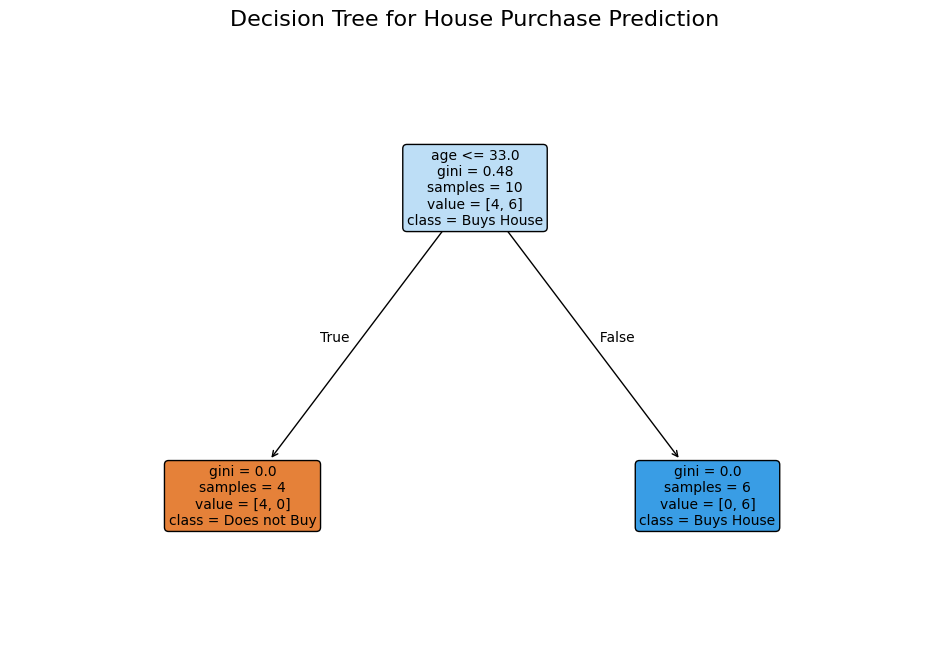

In [2]:
# Cell 2: Exercise 7.6.1 - House Purchase Prediction

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Create a sample dataset based on the exercise description
data = {
    'age': [25, 35, 45, 28, 55, 31, 60, 42, 22, 50],
    'income': [50000, 80000, 120000, 60000, 90000, 40000, 150000, 110000, 45000, 130000],
    'buys_house': [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]  # 0: No, 1: Yes
}
df_house = pd.DataFrame(data)

print("Sample Dataset for House Purchase Prediction:")
print(df_house)

# Step 2: Define features and target
features = ['age', 'income']
target = 'buys_house'
X = df_house[features]
y = df_house[target]

# Step 3: Create and train the Decision Tree model
# For a small dataset, we can train on the whole set to see the rules it learns
house_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
house_clf.fit(X, y)

# Step 4: Visualize the decision tree
# This visualization shows how the data is split based on the variables.
plt.figure(figsize=(12, 8))
plot_tree(
    house_clf,
    feature_names=features,
    class_names=['Does not Buy', 'Buys House'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for House Purchase Prediction", fontsize=16)
plt.show()

This model uses the weather to decide on an after-work activity.

Original Sample Dataset:
   weather   action
0    Sunny   Go Out
1  Raining  Stay In
2    Sunny   Go Out
3    Sunny   Go Out
4  Raining  Stay In
5    Sunny   Go Out
6  Raining  Stay In

Processed Features (X):
   weather_Sunny
0           True
1          False
2           True
3           True
4          False
5           True
6          False


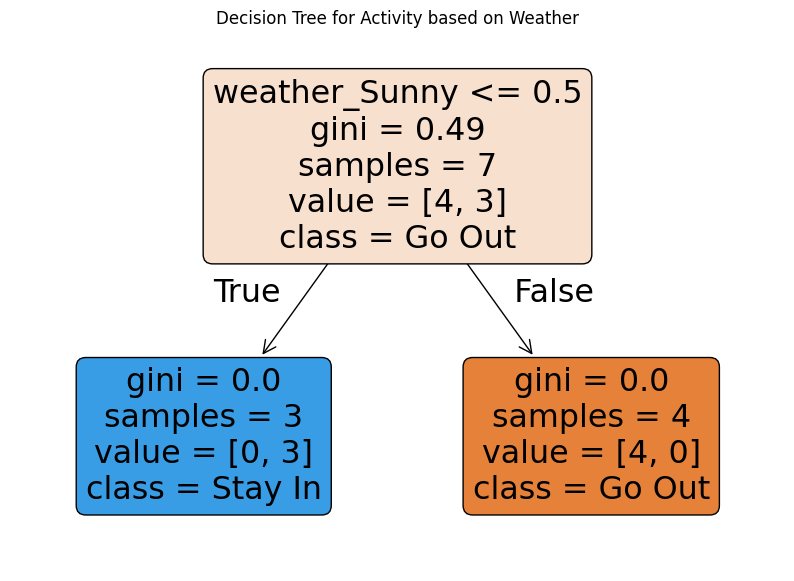

In [3]:
# Cell 3: Exercise 7.6.2 - Activity Prediction based on Weather

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Create a sample dataset
# The features are categorical, so we need to encode them.
data = {
    'weather': ['Sunny', 'Raining', 'Sunny', 'Sunny', 'Raining', 'Sunny', 'Raining'],
    'action': ['Go Out', 'Stay In', 'Go Out', 'Go Out', 'Stay In', 'Go Out', 'Stay In']
}
df_weather = pd.DataFrame(data)
print("Original Sample Dataset:")
print(df_weather)

# Step 2: Preprocess the data (convert text to numbers)
# We use one-hot encoding for the feature 'weather'.
X = pd.get_dummies(df_weather[['weather']], drop_first=True)
y = df_weather['action']

print("\nProcessed Features (X):")
print(X)

# Step 3: Create and train the model
weather_clf = DecisionTreeClassifier(random_state=42)
weather_clf.fit(X, y)

# Step 4: Visualize the tree
plt.figure(figsize=(10, 7))
plot_tree(
    weather_clf,
    feature_names=X.columns,
    class_names=['Go Out', 'Stay In'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Activity based on Weather")
plt.show()